In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# Criar um DataFrame com os dados fictícios
data = {
    'Símbolo': ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'FB'],
    'Preço da Ação': [150.12, 2700.45, 300.89, 3200.10, 700.78, 350.40],
    'Volume de Negociação': [3000000, 1000000, 2500000, 1200000, 5000000, 900000],
    'Capitalização de Mercado': [2000000000000, 1800000000000, 2200000000000, 1700000000000, 750000000000, 900000000000]
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,Símbolo,Preço da Ação,Volume de Negociação,Capitalização de Mercado
0,AAPL,150.12,3000000,2000000000000
1,GOOGL,2700.45,1000000,1800000000000
2,MSFT,300.89,2500000,2200000000000
3,AMZN,3200.10,1200000,1700000000000
4,TSLA,700.78,5000000,750000000000


In [5]:
# Selecionar as colunas relevantes para o agrupamento
X = df[['Preço da Ação', 'Volume de Negociação', 'Capitalização de Mercado']]

In [6]:
# Executar o algoritmo K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [7]:
# Adicionar os rótulos dos clusters ao DataFrame original
df['Cluster'] = kmeans.labels_

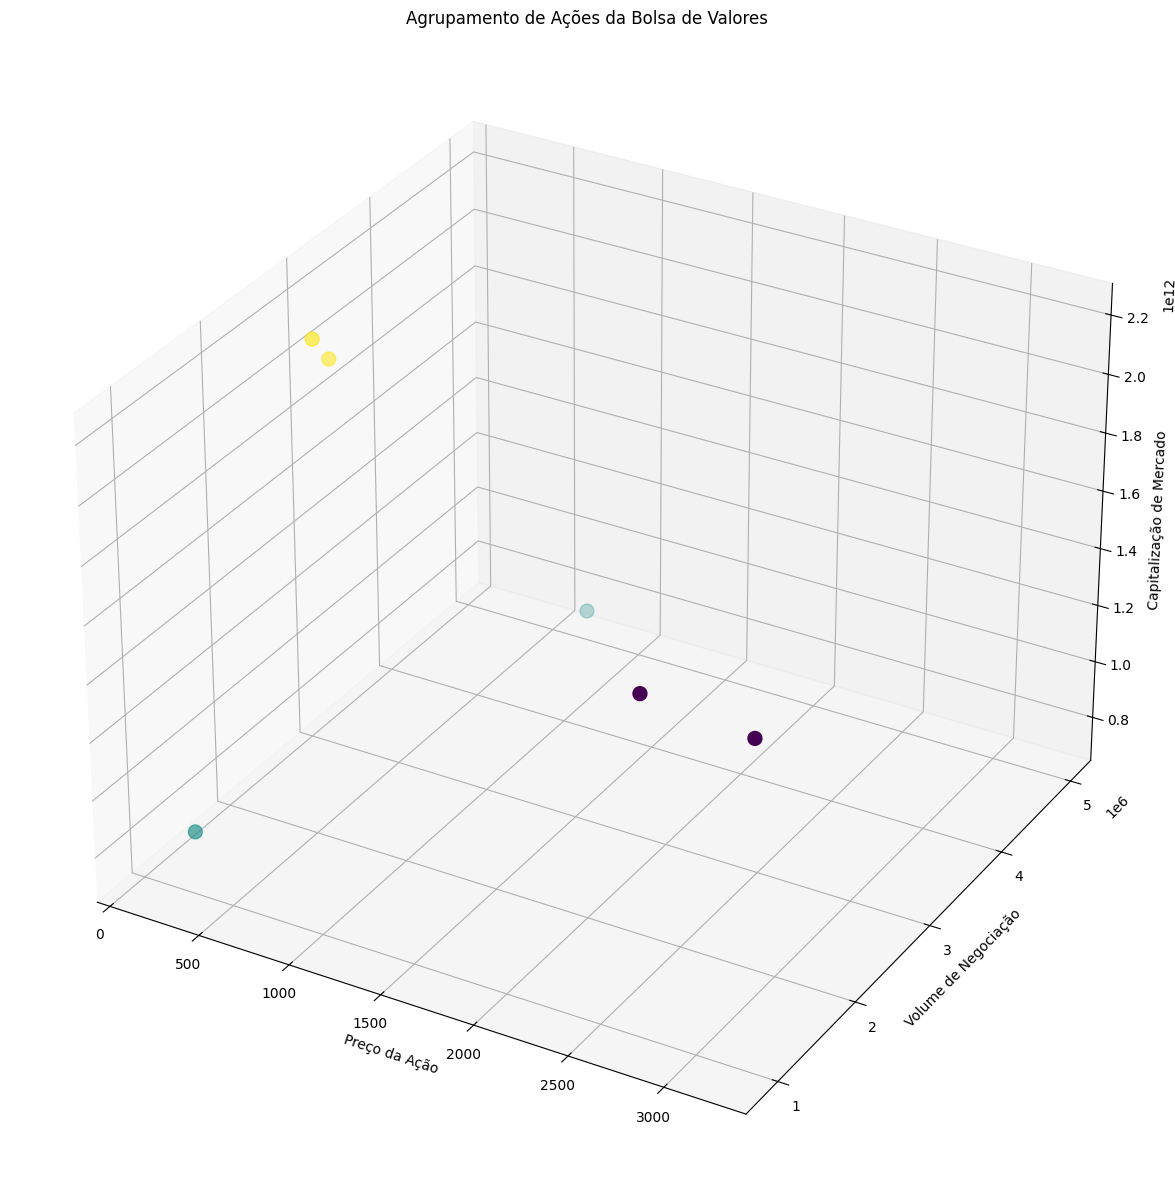

  Símbolo  Preço da Ação  Volume de Negociação  Capitalização de Mercado  \
0    AAPL         150.12               3000000             2000000000000   
1   GOOGL        2700.45               1000000             1800000000000   
2    MSFT         300.89               2500000             2200000000000   
3    AMZN        3200.10               1200000             1700000000000   
4    TSLA         700.78               5000000              750000000000   
5      FB         350.40                900000              900000000000   

   Cluster  
0        2  
1        0  
2        2  
3        0  
4        1  
5        1  


In [8]:
# Visualize os grupos formados em um gráfico 3D
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['Preço da Ação'], X['Volume de Negociação'], X['Capitalização de Mercado'], c=kmeans.labels_, s=100)
ax.set_xlabel('Preço da Ação')
ax.set_ylabel('Volume de Negociação')
ax.set_zlabel('Capitalização de Mercado')

plt.title('Agrupamento de Ações da Bolsa de Valores')
plt.show()

# Analisar os clusters formados
print(df)

<Axes: xlabel='Símbolo', ylabel='Preço da Ação'>

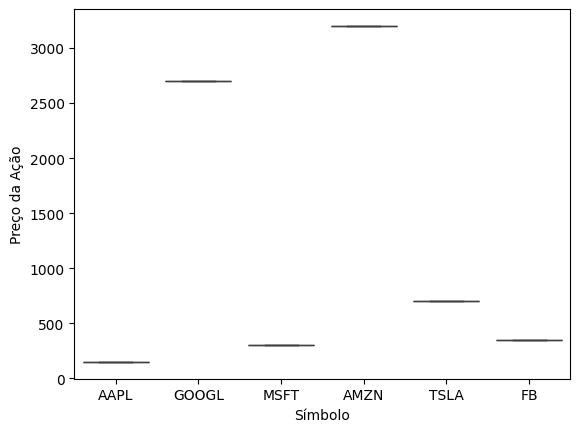

In [9]:
sns.boxplot(x =df['Símbolo'],y=df['Preço da Ação'])

In [10]:
dados_ativos = pd.get_dummies(df,columns= ['Símbolo'])

In [11]:
dados_ativos

,Preço da Ação,Volume de Negociação,Capitalização de Mercado,Cluster,Símbolo_AAPL,Símbolo_AMZN,Símbolo_FB,Símbolo_GOOGL,Símbolo_MSFT,Símbolo_TSLA
0,150.12,3000000,2000000000000,2,True,False,False,False,False,False
1,2700.45,1000000,1800000000000,0,False,False,False,True,False,False
2,300.89,2500000,2200000000000,2,False,False,False,False,True,False
3,3200.10,1200000,1700000000000,0,False,True,False,False,False,False
4,700.78,5000000,750000000000,1,False,False,False,False,False,True
5,350.40,900000,900000000000,1,False,False,True,False,False,False


In [13]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dados_ativos)

KMeans(n_clusters=4)

In [14]:
sse = kmeans.inertia_

In [15]:
print('SSE: ', sse)

SSE:  1.6250000008425e+22


In [16]:
# Visualizando os agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

Text(0, 0.5, 'Preço')

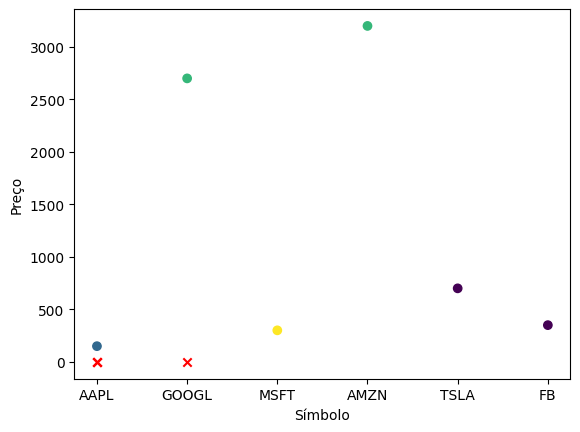

In [18]:

# Plotando as visualizações
plt.scatter(data['Símbolo'],data['Preço da Ação'],c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color = 'red')
plt.xlabel('Símbolo')
plt.ylabel('Preço')